In [2]:
# Libraries we use for data analysis and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# libraries used for the notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

from ml import plots


# Aufgabe 17

## Messwerte

In [3]:
fuszi_temp=np.array([29.4,26.7,28.3,21.1,20,18.3,17.8,22.2,20.6,23.9,23.9,22.2,27.2,21.7])
fuszi_wet=np.array([2,2,1,0,0,0,1,2,2,0,2,1,1,0])
fuszi_feucht=np.array([85,90,78,96,80,70,65,95,70,80,70,90,75,80])
fuszi_wind=np.array([0,1,0,0,0,1,1,0,0,0,1,1,0,1])
fuszi_bool=np.array([0,0,1,1,1,0,1,0,1,1,1,1,1,0])


## c)

Entropiefunktion:

In [4]:
def entropie(p):     #param ist schnittparameter. param=1 für bool
    
    l=len(p)
    a=len(p[p==1])
    b=l-a
    
    if a!=l and a!=0:
        E= -(a/l) * np.log2(a/l) - b/l *np.log2(b/l)
    else:
        E=0
        
    return E

Informationsgewinnfunktion:

In [71]:
def CE(param,Y,X):            #param ist schnittparameter. param=1 für bool
    
    l=len(X)
    a=len(X[X>=param])
    b=l-a

    
    fall_trueX=np.zeros(2)      #erste Stelle ist für X==true
    fall_falseX=np.zeros(2)
    
    for i in range(0,l):
        if Y[i]==1:
            if X[i]>=param:
                fall_trueX[0]+=1
            else:
                fall_trueX[1]+=1
        
        else:
            if X[i]>=param:
                fall_falseX[0]+=1
            else:
                fall_falseX[1]+=1
    

    
    sum_Ytrue= fall_trueX[0]+fall_falseX[0]
    sum_Yfalse= fall_trueX[1]+fall_falseX[1]
        
        
##schlechte und müde Ausnahmebehandlung incoming##

    if sum_Ytrue==0 or sum_Yfalse==0:
        return 0

    
    if fall_trueX[0]==0:
        fall_trueX[0]=sum_Ytrue
    
    if fall_falseX[0]==0:
        fall_falseX[0]=sum_Ytrue

    
    if fall_trueX[1]==0:
        fall_trueX[1]=sum_Yfalse
    
    if fall_falseX[1]==0:
        fall_falseX[1]=sum_Yfalse
        
    
    
    E_trueX = a/l *( -fall_trueX[0]/sum_Ytrue * np.log2(fall_trueX[0]/sum_Ytrue) - fall_falseX[0]/sum_Ytrue * np.log2(fall_falseX[0]/sum_Ytrue) )
    E_falseX = b/l *( -fall_trueX[1]/sum_Yfalse * np.log2(fall_trueX[1]/sum_Yfalse) - fall_falseX[1]/sum_Yfalse * np.log2(fall_falseX[1]/sum_Yfalse) )    
    
    return E_trueX + E_falseX
        
    
    
    

In [72]:
def IG(param,Y,X):
    
    return (entropie(Y))- CE(param,Y,X)

In [73]:
def IG_print(param,Y,X):
    printer=np.zeros(len(param))
    
    for i in range(0,len(param)):
        printer[i]=IG(param[i],Y,X)

    return printer
        

Temperatur:

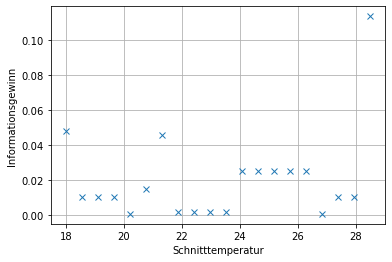

In [89]:
x=np.linspace(18,28.5,20)

plt.figure()
plt.plot(x,IG_print(x,fuszi_bool,fuszi_temp),"x",label="Informationsgewinn")
plt.xlabel("Schnitttemperatur")
plt.ylabel("Informationsgewinn")
plt.grid()

Wettervorhersage:

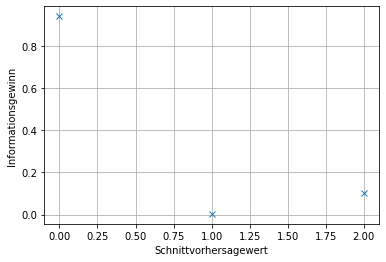

In [85]:
x=np.linspace(0,2,3)

plt.figure()
plt.plot(x,IG_print(x,fuszi_bool,fuszi_wet),"x",label="Informationsgewinn")
plt.xlabel("Schnittvorhersagewert")
plt.ylabel("Informationsgewinn")
plt.grid()

Luftfeuchtigkeit:

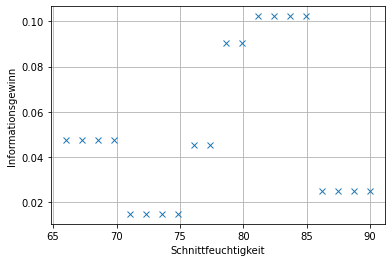

In [84]:

x=np.linspace(66,90,20)

plt.figure()
plt.plot(x,IG_print(x,fuszi_bool,fuszi_feucht),"x",label="Informationsgewinn")
plt.xlabel("Schnittfeuchtigkeit")
plt.ylabel("Informationsgewinn")
plt.grid()

## d)

Bei den min oder max der Arrays ergeben sich bei uns zu große Werte. Vermutlich haben sich abgesehen davon auch noch ein paar Fehler eingeschlichen.  
Ich hoffe mal das war alles nicht zu schlimm zu korrigieren.  
  
Abgesehen davon; Für die Temperatur und die Luftfeuchtigkeit ergeben sich die größten Informationsgewinne, wenn man die Schnitte geschickt setzt.